In [ ]:
#!pip install librosa
#!pip install scikeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 28.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.3.3 which is incompatible.


In [ ]:
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import librosa
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import os
from tensorflow import keras
from tensorflow.keras import regularizers
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
def extract_features(file_path):

    audio, sample_rate = librosa.load(file_path, sr=None)
    #print("audio ",audio)
    #print("sample rate", sample_rate)

    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    #print("mfccs", mfccs)
    #print("shape mfcc", mfccs.shape)

    mfccs_processed = np.mean(mfccs.T, axis=0)
    #print("mfccs_processed", mfccs_processed)
    #print("shape mfccs processed", mfccs_processed.shape)

    return mfccs_processed

In [ ]:
root_dir = '/content/drive/MyDrive/training/VoxCeleb_gender'

features = []
labels = []

for label in ['males', 'females']:
    folder_path = os.path.join(root_dir, label)
    for file in os.listdir(folder_path):
         if file.endswith('.wav'):
             file_path = os.path.join(folder_path, file)
             data = extract_features(file_path)
             features.append(data)
             labels.append(label)
features = np.array(features)
labels = np.array(labels)

In [ ]:
print(features)
print("features shape:", features.shape)

[[-2.85427460e+02  1.20391502e+02  7.33055973e+00 ... -1.44163406e+00
   5.35994992e-02 -6.24112904e-01]
 [-2.61631958e+02  1.27847511e+02 -1.80217724e+01 ... -1.73456931e+00
  -1.82942903e+00 -5.11852407e+00]
 [-2.52073929e+02  1.25026505e+02  2.42855110e+01 ... -1.46316648e+00
  -4.31528521e+00 -2.45268655e+00]
 ...
 [-3.41597687e+02  1.04545158e+02 -1.45478296e+01 ... -2.99125600e+00
   4.97325838e-01  7.27813721e-01]
 [-1.85942093e+02  8.33500443e+01  1.35160227e+01 ... -4.57145780e-01
   8.49319994e-01  2.28090644e+00]
 [-3.31956909e+02  5.33926392e+01 -3.10501728e+01 ...  5.83644211e-01
   3.50617290e-01 -2.73209381e+00]]
features shape: (6003, 40)


In [ ]:
print(labels)
print("labels shape:", labels.shape)

['males' 'males' 'males' ... 'females' 'females' 'females']
labels shape: (6003,)


In [ ]:
#labels_list = list(labels)

#for i, label in enumerate(labels_list):
#  if label == 'females':
#    labels_list[i] = 0
#  elif label == 'males':
#    labels_list[i] = 1

#print(labels_list)
#print(len(labels_list))

In [ ]:
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)

print(labels_encoded)
print(labels_encoded.shape)

[1 1 1 ... 0 0 0]
(6003,)


In [ ]:
x_train, x_test_1, y_train, y_test_1 = train_test_split(features, labels_encoded, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [ ]:
def gender_prediction(file_path):
  feature = extract_features(file_path)
  feature = np.array([feature])
  prediction = model.predict(feature)
  print(prediction)
  pred_label = le.inverse_transform([int(round(prediction[0][0]))])[0]
  return pred_label

In [ ]:
#best model
model = Sequential()

model.add(Flatten(input_shape=(40,)))
model.add(BatchNormalization())

model.add(Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.005)))
model.add(Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.05)))
model.add(Dense(10, activation="relu",kernel_regularizer=regularizers.l2(0.05)))
model.add(Dropout(0.09))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer= 'Adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7517 - loss: 1.9564 - val_accuracy: 0.8702 - val_loss: 1.0500
Epoch 2/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8879 - loss: 0.9007 - val_accuracy: 0.9118 - val_loss: 0.6093
Epoch 3/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9049 - loss: 0.5475 - val_accuracy: 0.9185 - val_loss: 0.4575
Epoch 4/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9150 - loss: 0.4354 - val_accuracy: 0.9218 - val_loss: 0.3987
Epoch 5/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9147 - loss: 0.3753 - val_accuracy: 0.9251 - val_loss: 0.3687
Epoch 6/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9071 - loss: 0.3622 - val_accuracy: 0.9201 - val_loss: 0.3537
Epoch 7/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9187 - loss: 0.3299 - val_accuracy: 0.9251 - val_loss: 0.3406
Epoch 8/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9155 - loss: 0.3245 - val_accuracy: 0.

In [ ]:
train_accuracy = model.evaluate(x_train,y_train)
val_accuracy = model.evaluate( x_val,y_val)
test_accuracy = model.evaluate(x_test, y_test)

print(f'Training Accuracy: {train_accuracy[1]*100:.2f}%')
print(f'Validation Accuracy: {val_accuracy[1]*100:.2f}%')
print(f'Test Accuracy: {test_accuracy[1]*100:.2f}%')

151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9343 - loss: 0.2304
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9169 - loss: 0.2965 
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9016 - loss: 0.2651 
Training Accuracy: 93.38%
Validation Accuracy: 92.85%
Test Accuracy: 89.33%


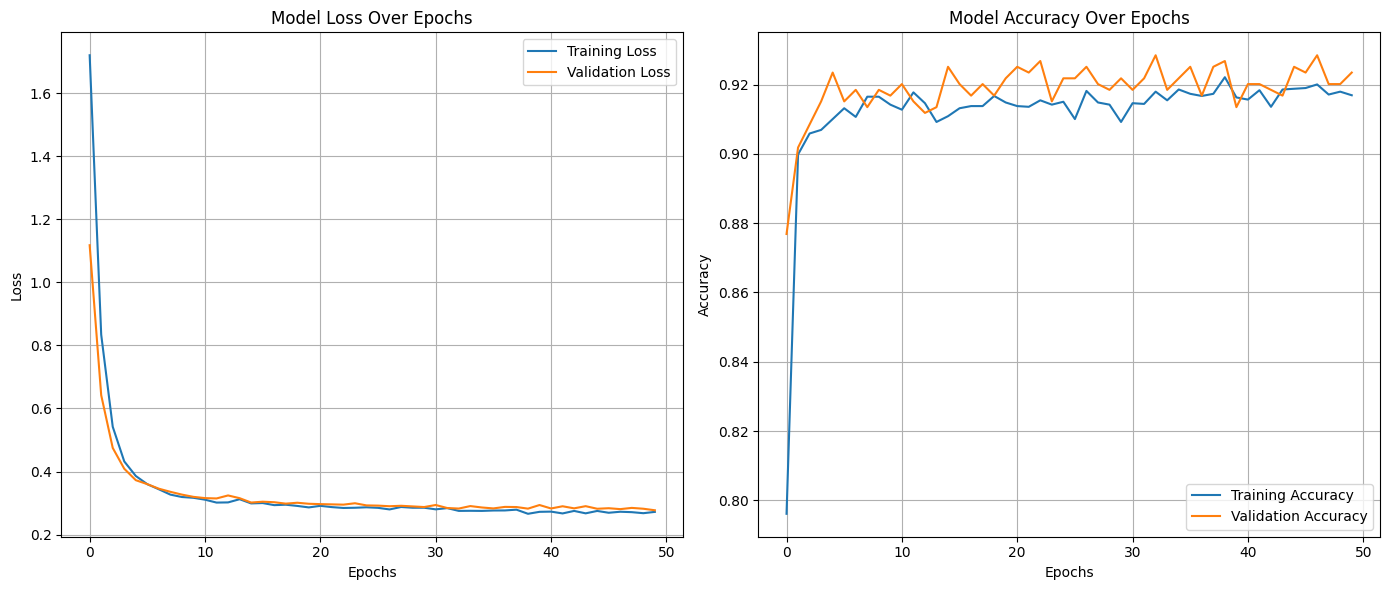

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
y_pred_probs = model.predict(x_test)
y_pred = np.round(y_pred_probs).astype(int)##
#print(y_pred)
#print(y_test)
print(gender_prediction('voice.wav'))#female
print(gender_prediction('voice3.wav'))#male

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[0.35046807]]
females
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[[0.7408606]]
males


In [ ]:
def create_model(neurons_per_layer, dropout_rate, activation, optimizer, l2_regs_per_layer):

  model = Sequential()
  model.add(Flatten(input_shape=(40,)))
  model.add(BatchNormalization())

  for neurons, l2_reg in zip(neurons_per_layer, l2_regs_per_layer):
    model.add(Dense(neurons, activation=activation, kernel_regularizer=regularizers.l2(l2_reg)))
    model.add(Dropout(dropout_rate))

  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

  return model

In [ ]:
param_grid = [
    {
        'model__neurons_per_layer': [[64]],
        'model__l2_regs_per_layer': [[0.005]],
        'model__dropout_rate': [0.5, 0.6, 0.7, 0.8],
        'model__activation': ['relu', 'tanh'],
        'model__optimizer': ['adam']
    },
    {
        'model__neurons_per_layer': [[64, 32]],
        'model__l2_regs_per_layer': [[0.005, 0.05]],
        'model__dropout_rate': [0.5, 0.6, 0.7, 0.8],
        'model__activation': ['relu', 'tanh'],
        'model__optimizer': ['adam']
    },
    {
        'model__neurons_per_layer': [[64, 32, 8]],
        'model__l2_regs_per_layer': [[0.005, 0.05, 0.05]],
        'model__dropout_rate': [0.5, 0.6, 0.7, 0.8],
        'model__activation': ['relu', 'tanh'],
        'model__optimizer': ['adam']
    }
]


In [ ]:
model = KerasClassifier(model=create_model)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, scoring='accuracy')
grid_result = grid.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_val, y_val))

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5804 - loss: 1.0001 - val_accuracy: 0.8502 - val_loss: 0.5623
Epoch 2/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8178 - loss: 0.6337 - val_accuracy: 0.8835 - val_loss: 0.4792
Epoch 3/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8696 - loss: 0.5163 - val_accuracy: 0.9085 - val_loss: 0.4321
Epoch 4/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8901 - loss: 0.4554 - val_accuracy: 0.9151 - val_loss: 0.3992
Epoch 5/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9021 - loss: 0.4203 - val_accuracy: 0.9118 - val_loss: 0.3789
Epoch 6/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9008 - loss: 0.3975 - val_accuracy: 0.9185 - val_loss: 0.3631
Epoch 7/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9028 - loss: 0.3789 - val_accuracy: 0.9235 - val_loss: 0.3486
Epoch 8/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9009 - loss: 0.3656 - val_accuracy: 0.9251 - val_loss: 0.3351
Epo

In [ ]:
print("Parameters that gave the best results: ", grid_result.best_params_)

Parameters that gave the best results:  {'model__activation': 'relu', 'model__dropout_rate': 0.7, 'model__l2_regs_per_layer': [0.005], 'model__neurons_per_layer': [64], 'model__optimizer': 'adam'}


In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(40,)))
model.add(BatchNormalization())
model.add(Dense(64, activation="relu",kernel_regularizer=regularizers.l2(0.005)))
model.add(Dropout(0.7))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer= 'Adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_val, y_val))

Epoch 1/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6597 - loss: 0.8994 - val_accuracy: 0.8769 - val_loss: 0.5635
Epoch 2/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8310 - loss: 0.6093 - val_accuracy: 0.8968 - val_loss: 0.4676
Epoch 3/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8671 - loss: 0.5072 - val_accuracy: 0.8985 - val_loss: 0.4233
Epoch 4/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8779 - loss: 0.4733 - val_accuracy: 0.9118 - val_loss: 0.3989
Epoch 5/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8866 - loss: 0.4331 - val_accuracy: 0.9135 - val_loss: 0.3809
Epoch 6/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8913 - loss: 0.3972 - val_accuracy: 0.9168 - val_loss: 0.3641
Epoch 7/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9089 - loss: 0.3589 - val_accuracy: 0.9168 - val_loss: 0.3512
Epoch 8/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9040 - loss: 0.3552 - val_accuracy: 0.9185 - val_loss:

In [ ]:
train_accuracy = model.evaluate(x_train,y_train)
val_accuracy = model.evaluate( x_val,y_val)
test_accuracy = model.evaluate(x_test, y_test)

print(f'Training Accuracy: {train_accuracy[1]*100:.2f}%')
print(f'Validation Accuracy: {val_accuracy[1]*100:.2f}%')
print(f'Test Accuracy: {test_accuracy[1]*100:.2f}%')

151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9322 - loss: 0.2057
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9152 - loss: 0.2859 
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9096 - loss: 0.2462 
Training Accuracy: 93.13%
Validation Accuracy: 92.01%
Test Accuracy: 90.17%


In [ ]:
y_pred_probs = model.predict(x_test)
y_pred = np.round(y_pred_probs).astype(int)##
print(y_pred)
print(y_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[[0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]


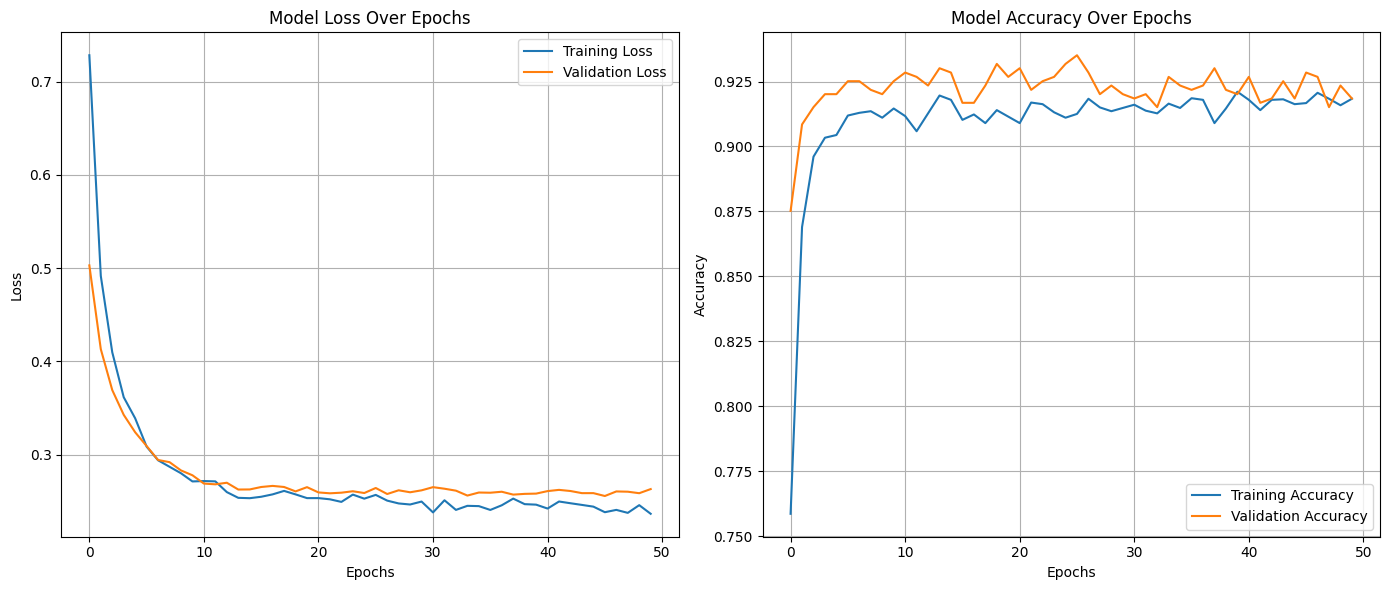

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
print(gender_prediction('voice.wav'))#female
print(gender_prediction('voice3.wav'))#male

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
[[0.35046807]]
females
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
[[0.7408606]]
males
